Now start reading wave ...
Please input the file name of your wav fille 0w0 
**(No need to type .wav)**
File name:Recording-3
Saving sound into files ...


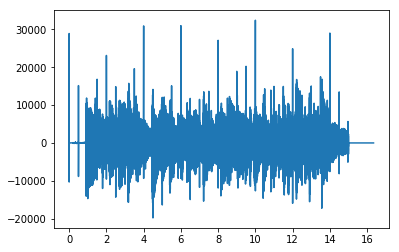

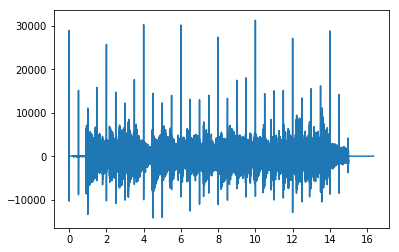

Start produce chaos ...
Combine chaos and sound ...
Integration successful.
Signal from chaos


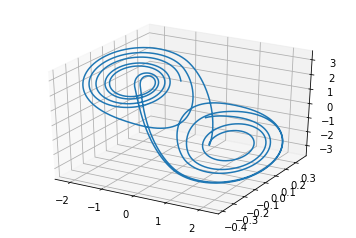

Combined signal


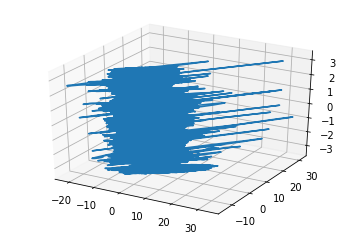

Combined signal from sound 1


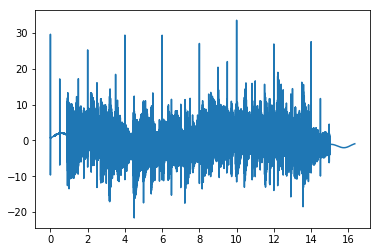

Combined signal from sound 2


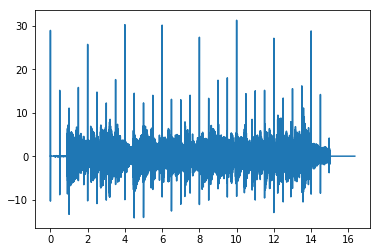

Pure chaos for sound 1


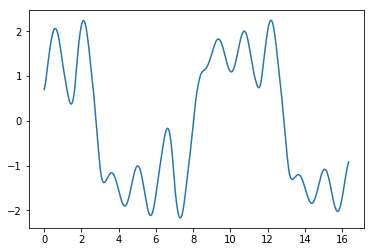

Saving sound + chaos for next step ...


In [1]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import wave
import numpy as np
import matplotlib.pyplot as plt

print("Now start reading wave ...")
f1= open("sound1.txt","w")
f2= open("sound2.txt","w")
f3= open("time.txt","w")
def read_wav_data(filename):
    wav = wave.open(filename,"rb") # 打开一个wav格式的声音文件流
    num_frame = wav.getnframes() # 获取帧数
    num_channel=wav.getnchannels() # 获取声道数
    framerate=wav.getframerate() # 获取帧速率
    num_sample_width=wav.getsampwidth() # 获取实例的比特宽度，即每一帧的字节数
    str_data = wav.readframes(num_frame) # 读取全部的帧
    wav.close() # 关闭流
    wave_data = np.fromstring(str_data, dtype = np.short) # 将声音文件数据转换为数组矩阵形式
    wave_data.shape = -1, num_channel # 按照声道数将数组整形，单声道时候是一列数组，双声道时候是两列的矩阵
    wave_data = wave_data.T # 将矩阵转置
    wave_data = wave_data 
    return wave_data, framerate


def wav_show(wave_data, fs): # 显示出来声音波形
    time = np.arange(0, len(wave_data)) * (1.0/fs)  # 计算声音的播放时间，单位为秒
    # 画声音波形
    plt.plot(time, wave_data)  
    plt.show()
print ("Please input the file name of your wav fille 0w0 \n**(No need to type .wav)**")
a = input("File name:")
b = a+".wav"
print ("Saving sound into files ...")  
if(__name__=='__main__'):
	wave_data, fs = read_wav_data(b)  
	wav_show(wave_data[0],fs)
	wav_show(wave_data[1],fs)  # 如果是双声道则保留这一行，否则删掉这一行
	time = np.arange(0, len(wave_data[0])) * (1.0/fs)
	for i in range(len(wave_data[0])):
		f1.write(str(wave_data[0][i])+"\n")
		f2.write(str(wave_data[1][i])+"\n")	
		f3.write(str(time[i])+"\n")

#print (len(wave_data[0]))

framerate = 44100


# 产生10秒44.1kHz的100Hz - 1kHz的频率扫描波
#t = np.arange(0, time, 1.0/framerate)

wave_data = wave_data.astype(np.short)

# 打开WAV文档
f = wave.open(r"sweep2.wav", "wb")

# 配置声道数、量化位数和取样频率
f.setnchannels(1)
f.setsampwidth(2)
f.setframerate(framerate)
# 将wav_data转换为二进制数据写入文件
f.writeframes(wave_data.tostring())
f.close()

f1.close()
f2.close()
f3.close()

print ("Start produce chaos ...")

#define universal variables
c0 = 15.6
c1 = 1.0
c2 = 28.0
m0 = -1.143
m1 = -0.714

#open the data from our sound 
f12= open("sound1.txt","r")
f22= open("sound2.txt","r")
f32= open("time.txt","r")

#just a little extra, quite unimportant
def f(x):
    f = m1*x+(m0-m1)/2.0*(abs(x+1.0)-abs(x-1.0))
    return f

#the actual function calculating
def dH_dt(H, t=0):
    return np.array([c0*(H[1]-H[0]-f(H[0])),
                  c1*(H[0]-H[1]+H[2]),
                  -c2*H[1]])


print ("Combine chaos and sound ...")

#computational time steps
t=[]
sound1=[]
sound2=[]
for i in range (720832):
	t.append(float(f32.readline()))
	sound1.append(float(f12.readline()))
	sound2.append(float(f22.readline()))
for k in range(len(sound1)):
	sound1[k]=sound1[k]/1000.0
	sound2[k]=sound2[k]/1000.0

#x, y, and z initial conditions
H0 = [0.7, 0.0, 0.0]

H, infodict = integrate.odeint(dH_dt, H0, t, full_output=True)

print(infodict['message'])

#plt.subplot(221)

print ("Signal from chaos")
fig1=plt.figure(1)
ax = fig1.add_subplot(111, projection='3d')
ax.plot(H[:,0], H[:,1], H[:,2])
plt.show()

#plt.subplot(222)
"""
fig2=plt.figure(2)
x = np.sin(t)
plt.plot(t, x)
plt.show()
"""



#plt.subplot(223)
print ("Combined signal")
fig3 = plt.figure(3)
ax = fig3.add_subplot(111, projection='3d')
ax.plot(H[:,0]+sound1, H[:,1]+sound2, H[:,2])
plt.show()

out1=H[:,0]+sound1
out2=H[:,1]+sound2
#print (out)

print ("Combined signal from sound 1")
fig4=plt.figure(4)
plt.plot(t,out1)
plt.show()
print ("Combined signal from sound 2")
fig5=plt.figure(5)
plt.plot(t,sound2)
plt.show()


print ("Pure chaos for sound 1")
fig6=plt.figure(6)
plt.plot(t,H[:,0])
plt.show()

print ("Saving sound + chaos for next step ...")
f4= open("in1.txt","w")
f5= open("in2.txt","w")
for i in range(720832):
    f4.write(str(out1[i])+"\n")
    f5.write(str(out2[i])+"\n")


f4.close()
f5.close()
f12.close()
f22.close()
f32.close()


In [ ]:
import wave
import numpy as np
import scipy.signal as signal

framerate = 44100
time = 1

# 产生10秒44.1kHz的100Hz - 1kHz的频率扫描波
t = np.arange(0, time, 1.0/framerate)
wave_data = signal.chirp(t, 100, time, 1000, method='linear') * 100
wave_data = wave_data.astype(np.short)

# 打开WAV文档
f = wave.open(r"sweep.wav", "wb")

# 配置声道数、量化位数和取样频率
f.setnchannels(1)
f.setsampwidth(2)
f.setframerate(framerate)
# 将wav_data转换为二进制数据写入文件
f.writeframes(wave_data.tostring())
f.close()

In [ ]:
import pyaudio
import wave

chunk = 1024

wf = wave.open(r"sweep2.wav", 'rb')

p = pyaudio.PyAudio()

# 打开声音输出流
stream = p.open(format = p.get_format_from_width(wf.getsampwidth()),
                channels = wf.getnchannels(),
                rate = wf.getframerate(),
                output = True)

# 写声音输出流进行播放
while True:
    data = wf.readframes(chunk)
    if data == "": break
    stream.write(data)

stream.close()
p.terminate()